<a href="https://colab.research.google.com/github/yashpickles/-Minimizing-Churn-of-Subscription-product-through-Analysis-of-Financial-Habits/blob/main/Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Case-Study:** **Minimizing Churn of Subscription product through Analysis of Financial Habits**
## **-Yash Acharya**

### **1) Problem Statement**
Subscription products often are the main source of revenue for the companies for all industries. These products can come in the form of a 'one size fits all' overcompassing subscription or in a multi-level memberships. Regardless of how they structure their memberships or what industries they are in. Companies almost always try to minimize Customer Churn(a.k.a subscription cancellations). To retain their customers these companies first need to identify behavioural patterns that act as a catalyst in disengagement with the product.

**Market**: The target audience is the entirety of companies subscription. They are the ones that company wants. 

**Product**: The subcription products that the customers are already enrolled in can provide value that users may not have imagined or that they may have forgotten.

**Goal**: The Objective of this model is to predict which users are most likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email remainders about the benefits of the product, especially focusing on features that are new or that the user has shown to value. 

### **2) Importing the Libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **3) Importing the Dataset**

In [2]:
dataset = pd.read_csv('churn_data.csv')

### **4) Visualization of Dataset**

In [10]:
dataset.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [9]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [8]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### **4.a) Cleaning Data**

In [12]:
dataset.isna().any()
dataset.isna().sum()
dataset = dataset[pd.notnull(dataset['age'])]
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

### **4.b) Creating a Histogram**

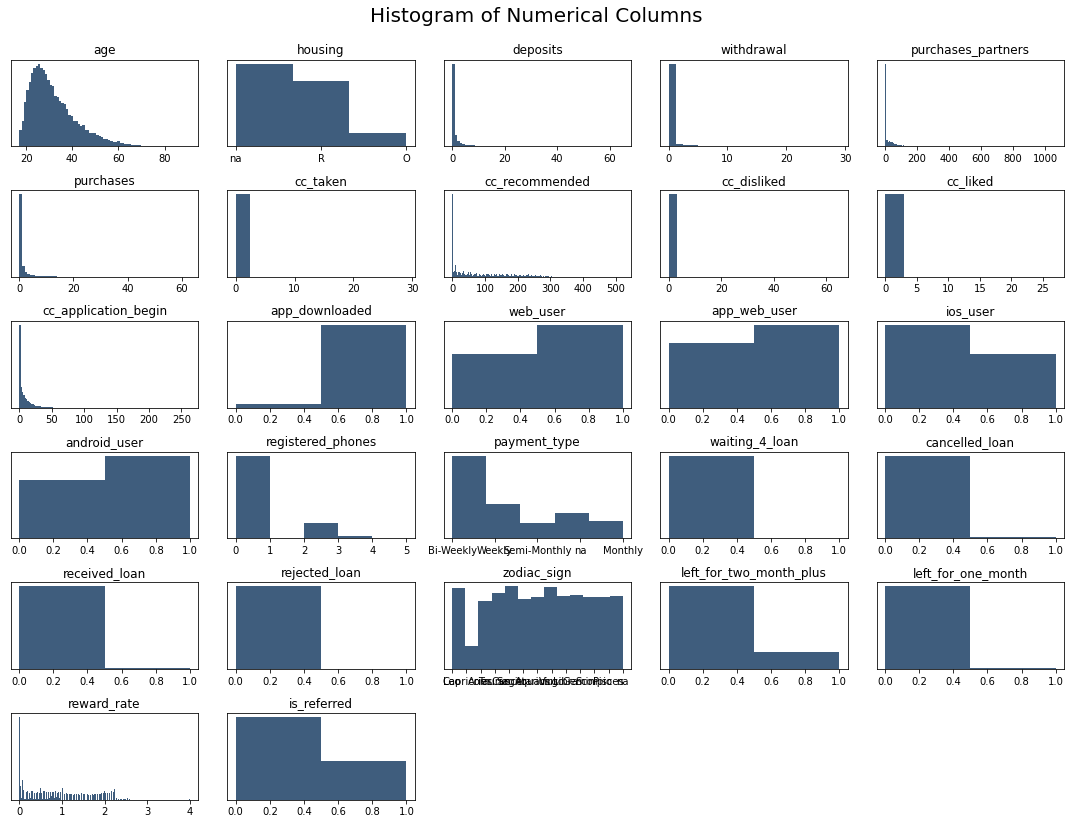

In [14]:
DataFrame = dataset.drop(columns=['user', 'churn'])
fig = plt.figure(figsize = (15, 12))
plt.suptitle('Histogram of Numerical Columns', fontsize=20)
for i in range(1, DataFrame.shape[1]+1):
  plt.subplot(6, 5, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(DataFrame.columns.values[i-1])
  vals = np.size(DataFrame.iloc[:, i-1].unique())
  plt.hist(DataFrame.iloc[:, i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### **4.c) Creating a Pie-Chart**

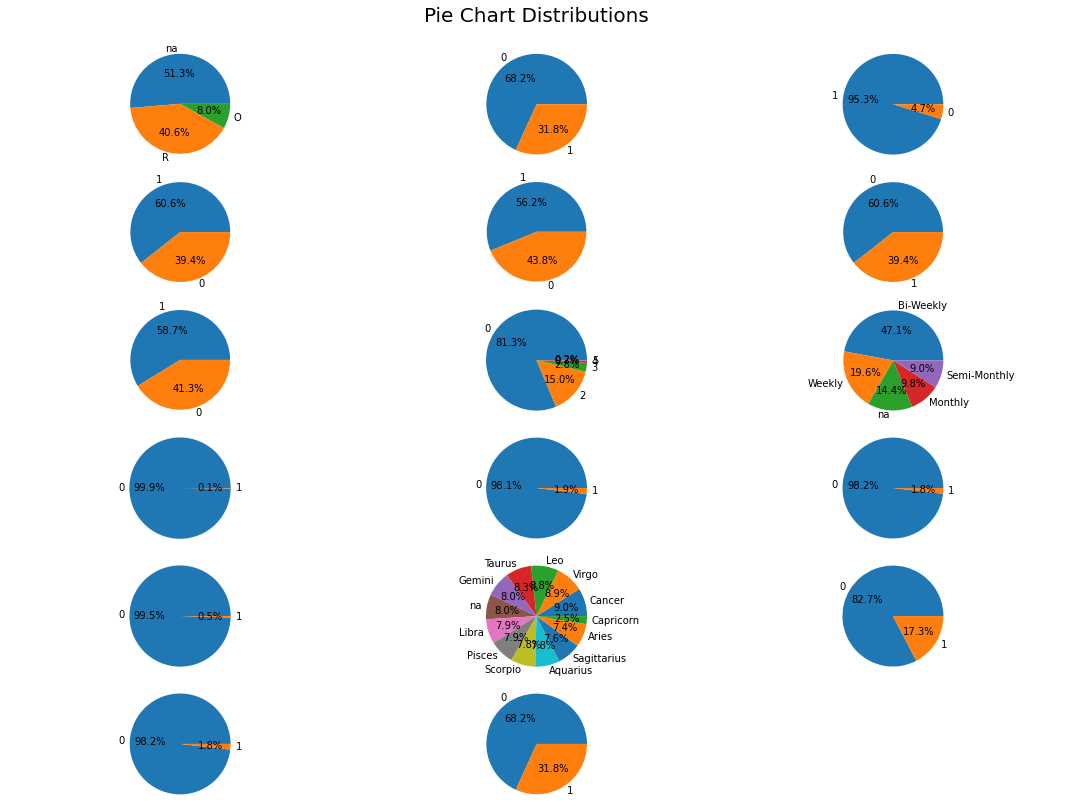

In [24]:
DataFrame = dataset[['housing', 'is_referred', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user',
                     'registered_phones', 'payment_type', 'waiting_4_loan','cancelled_loan', 'received_loan', 'rejected_loan',
                     'zodiac_sign','left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize = (15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, DataFrame.shape[1]+1):
  plt.subplot(6, 3, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  values = DataFrame.iloc[:, i-1].value_counts(normalize=True).values
  index = DataFrame.iloc[:, i-1].value_counts(normalize=True).index
  plt.pie(values, labels=index, autopct='%1.1f%%')
  plt.axis('equal')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

### **4.d) Exploring uneven features**

In [26]:
dataset[DataFrame.waiting_4_loan == 1].churn.value_counts()
dataset[DataFrame.cancelled_loan == 1].churn.value_counts()
dataset[DataFrame.received_loan == 1].churn.value_counts()
dataset[DataFrame.rejected_loan == 1].churn.value_counts()
dataset[DataFrame.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

###**4.e) Correlating with Response Variable**

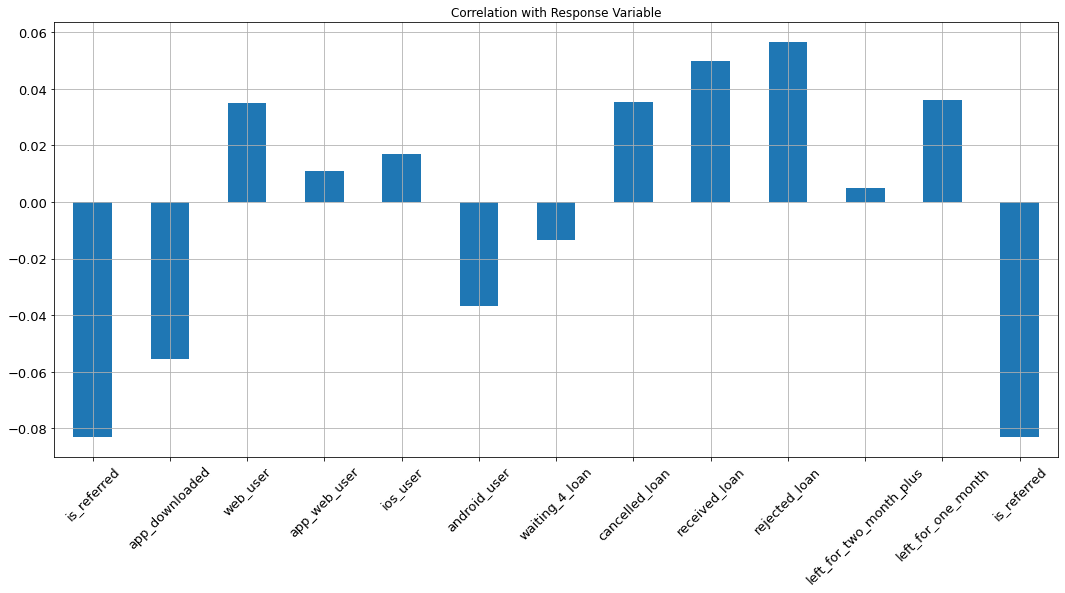

In [30]:
DataFrame.drop(columns=['housing', 'payment_type', 'registered_phones', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
                        figsize=(18, 8), title='Correlation with Response Variable', fontsize=13, rot=45, grid=True)

### **4.f) Correlational Matrix**

In [32]:
sns.set(style="white")

In [33]:
corr = dataset.drop(columns=['user', 'churn']).corr() 

In [34]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[(np.triu_indices_from(mask))]=True

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))

In [45]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

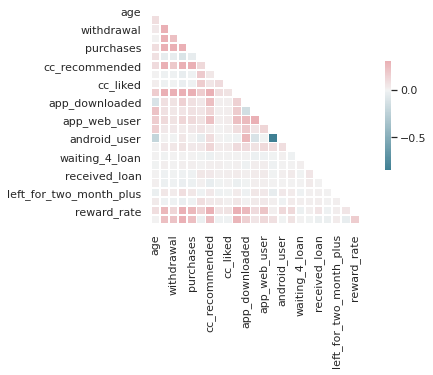

In [46]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":.5})

In [47]:
dataset = dataset.drop(columns=['app_web_user'])

### **5) Creating a New Dataset**

In [48]:
dataset.to_csv('New_churn_data1.csv', index=False)